# Problem Statement 

#### _<u>Introduction</u>_

To develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### _<u>Business Risks</u>_ 

- If the applicant is __likely to repay the loan__, then not approving the loan results in a loss of business to the company.

- If the applicant is __not likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

#### _<u>Business Objectives</u>_ 

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

#### _<u>Aim of this Case Study</u>_

To identify "risky applicants" so that loans can be reduced thereby cutting down the amount of credit loss. [Credit loss it the amount of money lost by the lender when the borrower refuses to pay or runs away with the money that needs to be paid to the company]



# Using Required Libraries



In [132]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress/Ignore warning
import warnings 
warnings.filterwarnings('ignore')

# Understanding Data

In [133]:
# loading the data from csv file into data frame
loan_df = pd.read_csv(r'C:\loan.csv')

##### Printing the first 5 rows of the data frame 

In [134]:
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [135]:
# Show all the columns in a data frame 
pd.set_option('display.max_columns', None)

In [136]:
# Get the number of rows and columns in a data frame using shape method

loan_df.shape

(39717, 111)

Total number of Rows: 39717 <br>
Total number of columns: 111

In [137]:
# Dataframe details using info object 

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [138]:
# List of columns in dataframe
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [139]:
# Describe the data frame using describe method 

loan_df.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

In [140]:
# Identify the data type of each column

loan_df.dtypes 

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [141]:
# check if there are missing values in the dataframe 

loan_df.isnull().sum().sum() # Returns 2263366 values 

2263366

In [142]:
# check if there are any duplicate rows 

loan_df.duplicated().sum() # there are zero duplicate records

0

In [143]:
# List missing values by columns 
pd.set_option('display.max_rows',None)
loan_df.isnull().sum()


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [144]:
# List all the columns with more than zero null values 

havingnullvalues = loan_df.isnull().sum()
print(havingnullvalues[havingnullvalues > 0])

emp_title                          2459
emp_length                         1075
desc                              12942
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


In [145]:
# List all the columns where null values matches the rows count 

columnnullvaluesmatchrows = loan_df.isnull().sum()
print(columnnullvaluesmatchrows[columnnullvaluesmatchrows == loan_df.shape[0]])


mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [146]:
# Count of columns with all null values 

CountofAllNullvaluesCol =  loan_df.isnull().sum()
listofrecords = CountofAllNullvaluesCol[CountofAllNullvaluesCol == loan_df.shape[0]]
print(listofrecords.value_counts()) # Returns 54 columns 

39717    54
Name: count, dtype: int64


# Data Cleaning & Manipulation

##### Step 1: Dropping the (54) Columns with all null values 

In [147]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [148]:
# Loading the dataframe after dropping the columns 
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [149]:
# Checking for rows and columns count

loan_df.shape # Returns 39717 rows and 57 columns

(39717, 57)

In [150]:
# Find all columns with single value 
singlevaluedcol = loan_df.nunique() 
print(singlevaluedcol[singlevaluedcol == 1])

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64


##### Step 2: Dropping columns with same values that is unique value count is 1

In [151]:
loan_df.drop(["pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"], axis = 1, inplace = True)


In [152]:
# Checking for rows and columns count

loan_df.shape # Returns 39717 rows and 48 columns

(39717, 48)

##### Step 3: Checking columns with large percentage of null values and drop these columns

In [153]:
# Finding the percentage of missing values 
100 * (loan_df.isnull().sum()/len(loan_df.index))

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.585543
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

In [154]:
# Filter only columns having values greater than zero 

missingvaluespercentage = 100 * (loan_df.isnull().sum()/len(loan_df.index))
print(missingvaluespercentage[missingvaluespercentage > 0.0])


emp_title                  6.191303
emp_length                 2.706650
desc                      32.585543
title                      0.027696
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
revol_util                 0.125891
last_pymnt_d               0.178765
next_pymnt_d              97.129693
last_credit_pull_d         0.005036
pub_rec_bankruptcies       1.754916
dtype: float64


In [155]:
# Dropping columns with high missing value percentage 
loan_df.drop(["mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d"], axis = 1, inplace = True)

In [156]:
# Removing desc column as it a free text data as per data dictionary
loan_df.drop(["desc"], axis = 1, inplace = True)

# Removing emp_title column which does not contribute any meaning on analysis and having 6% of missing values 
loan_df.drop(["emp_title"], axis = 1, inplace = True)


In [157]:
# Check for the missing percentage of null values 
missingvaluespercentage = 100 * (loan_df.isnull().sum()/len(loan_df.index))
print(missingvaluespercentage[missingvaluespercentage > 0.0])

emp_length              2.706650
title                   0.027696
revol_util              0.125891
last_pymnt_d            0.178765
last_credit_pull_d      0.005036
pub_rec_bankruptcies    1.754916
dtype: float64


In [158]:
# Removing title, last_pymnt_d, last_credit_pull_d and pub_rec_bankruptcies which doesnt add value to the problem statement
loan_df.drop(["title", "last_pymnt_d", "last_credit_pull_d"], axis = 1, inplace = True)


##### Step 4: Checking columns for the percentage of null values and fill missing values

In [159]:
# Check for the missing percentage of null values 
missingvaluespercentage = 100 * (loan_df.isnull().sum()/len(loan_df.index))
print(missingvaluespercentage[missingvaluespercentage > 0.0])

emp_length              2.706650
revol_util              0.125891
pub_rec_bankruptcies    1.754916
dtype: float64


In [160]:
# Check the above column for values before filling missing/imputing values 

loan_df.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [161]:
loan_df.revol_util.value_counts()


revol_util
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
0.10%      58
31.20%     57
61%        57
46.40%     57
66.60%     57
65.90%     56
70.40%     56
57.40%     55
49.80%     55
48.90%     55
25.50%     55
37.60%     55
64.80%     55
27.20%     54
89.50%     54
35.30%     54
46.60%     54
51.10%     54
32%        54
76.60%     54
68.60%     54
78.70%     54
75.50%     54
64.60%     54
51.60%     54
72.10%     53
62.80%     53
54.30%     53
45.60%     53
55.80%     53
48.20%     53
47.80%     53
68.70%     53
33.70%     53
70.80%     53
34.40%     53
41%        53
70.10%     52
66.90%     52
55.10%     52
53.90%     52
51.50%     52
48%        52
41.60%     52
29.10%     52
70.30%     52
55.50%     52
74.90%     52
36.50%     52
40.20%     51
58.70%     51
41.40%     51
49.10%     51
89.90%     51
43.40%     51
30.90%     51
54.10%     51
35.70%     51
45.90%     51
88%        51
66.10%     51
49.60%     51
54.60%     51
57.90%     50
52.30%     50
19.80%   

In [162]:
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [163]:
# Imputing missing values with most frequently found values as the percentage of missing information is low instead of deleting the records. 
# Using mode function 

loan_df.revol_util.fillna(loan_df.revol_util.mode()[0], inplace = True)
loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0], inplace = True)


In [164]:
# Verifying for null values 

print(loan_df.revol_util.isna().sum())
print(loan_df.pub_rec_bankruptcies.isna().sum())

0
0


In [165]:
# Checking for all the columns for missing values
100 * (loan_df.isnull().sum()/len(loan_df.index)) # Missing percentage is zero as per the result

id                         0.00000
member_id                  0.00000
loan_amnt                  0.00000
funded_amnt                0.00000
funded_amnt_inv            0.00000
term                       0.00000
int_rate                   0.00000
installment                0.00000
grade                      0.00000
sub_grade                  0.00000
emp_length                 2.70665
home_ownership             0.00000
annual_inc                 0.00000
verification_status        0.00000
issue_d                    0.00000
loan_status                0.00000
url                        0.00000
purpose                    0.00000
zip_code                   0.00000
addr_state                 0.00000
dti                        0.00000
delinq_2yrs                0.00000
earliest_cr_line           0.00000
inq_last_6mths             0.00000
open_acc                   0.00000
pub_rec                    0.00000
revol_bal                  0.00000
revol_util                 0.00000
total_acc           

In [166]:
# Shape of the data frame after imputing missing values 

loan_df.shape 

(39717, 40)

##### Step 5: Checking columns that are not necessary and dropping them. 

- member_id 
- url 
- zip_code 

As these columns are having details corresponding to individual applicant and does not help in our analysis 


In [167]:
# Removing the above columns 

loan_df.drop(["member_id", "url", "zip_code"], axis = 1, inplace = True)

##### Step 6: Removing records that are not needed (Cleaning Rows)

In [168]:
# Keeping only records with loan status as completed and charged off for our analysis as per the problem statement. 
loan_df = loan_df[loan_df.loan_status != "Current"]

In [169]:
# Checking the loan status values 
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [170]:
# Check of the shape of the dataframe
loan_df.shape 

(38577, 37)

##### Step 7: Correcting the datatype and value of columns that are invalid

In [171]:
 # identify the column types 
loan_df.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [172]:
# Analysing each column with the data type as object
# Check for term data 
print(loan_df.term.unique())

[' 36 months' ' 60 months']


In [173]:
# Apply data correction on term data 
loan_df['term'] = loan_df['term'].str.rstrip(' months').astype('int') 

In [174]:
# Check for int_rate  
print(loan_df.int_rate.unique())

['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.40%' '21.48%' '14.82%' '14.17%'
 '7.29%' '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%'
 '15.65%' '17.14%' '11.11%' '10.37%' '16.40%' '17.51%' '7.66%' '18.6

In [175]:
# Apply data correction on term data 
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%').astype('float') 

In [176]:
# Check for int_rate  
print(loan_df.int_rate.unique())

[10.65 15.27 15.96 13.49  7.9  18.64 21.28 12.69 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 20.89 20.3  23.91 19.03 23.13 22.74 22.35 22.06 24.11  6.   23.52
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 19.29 13.99 18.39 16.89 17.99
 20.99 22.85 19.69 20.62 20.25 21.36 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 13.84 16.59
 17.19 12.87 20.69  9.67 21.82 19.79 18.49 22.94 24.4  21.48 14.82 14.17
  7.29 17.88 20.11 16.02 13.43 14.91 13.06 15.28 15.65 17.14 11.11 10.37
 16.4  17.51  7.66 18.62 10.74  5.79  6.92 10.    9.63 14.54 12.68 19.36
 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36  6.17
  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72 14.09
 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4  20.77
 18.91 21.14 17.44 13.23  7.88 11.12 13.61 10.38 17

In [177]:
# Check for grade data
loan_df.grade.unique() # data correction is not required here 

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [178]:
# Check for sub_grade data
loan_df.sub_grade.unique() # data correction is not required here

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [179]:
# Check for emp_length 
loan_df.emp_length.unique() 

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [180]:
# Applying data correction on emp_length 

#loan_df['emp_length'] = loan_df['emp_length'].str.replace('+','').str.replace('years','').str.replace('year','').str.replace(' ','').str.replace('<1','0').astype('int') 

In [181]:
# Check for emp_length data 
print(loan_df.emp_length.unique()) 

['10+ years' '< 1 year' '3 years' '8 years' '9 years' '4 years' '5 years'
 '1 year' '6 years' '2 years' '7 years' nan]


In [182]:
# Check for home_ownership data
print(loan_df.home_ownership.unique()) # data correction is not required here

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


In [183]:
# check for verification_status data # data correction is not required here
print(loan_df.verification_status.unique()) 

['Verified' 'Source Verified' 'Not Verified']


In [184]:
#check for issue_d data
print(loan_df.issue_d.unique()) 

['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07']


In [185]:
# deriving new columns based on issue_d for loan issue year and month 

loan_df_issue_d = loan_df['issue_d'].str.partition("-", True)  
loan_df['loan_issue_year']='20' + loan_df_issue_d[2]   
loan_df['loan_issue_month']=loan_df_issue_d[0]                       


In [186]:
# check the data frame for new columns 
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
5  1075269       5000         5000           5000.0    36      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
5       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
5            0           Nov-04               3         9        0       7963   

  revol_util  total_acc  out_prncp  out_prncp_inv   total_pymnt  \
0     83.70%          9        0.0            0.0   5863.155187   
1      9.40%          4        0.0            0.0   1008.710000   
2     98.50%         10        0.0            0.0   3005.666844   
3        21%         37        0.0            0.0  12231.890000   
5     28.30%         12        0.0            0.0   5632.210000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
5          5632.21          5000.00         632.21                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies  \
0        0.00                     0.00           171.62                   0.0   
1      117.08                     1.11           119.66                   0.0   
2        0.00                     0.00           649.91                   0.0   
3        0.00                     0.00           357.48                   0.0   
5        0.00                     0.00           161.03                   0.0   

  loan_issue_year loan_issue_month  
0            2011              Dec  
1            2011              Dec  
2            2011              Dec  
3            2011              Dec  
5            2011              Dec

In [187]:
#check for loan_status data
print(loan_df.loan_status.unique()) # data correction is not required here

['Fully Paid' 'Charged Off']


In [188]:
#check for purpose data 
print(loan_df.purpose.unique()) # data correction is not required here

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [189]:
# check for earliest_cr_line 
print(loan_df.earliest_cr_line.unique()) # data correction is not required here

['Jan-85' 'Apr-99' 'Nov-01' 'Feb-96' 'Nov-04' 'Jul-05' 'Jan-07' 'Apr-04'
 'Sep-04' 'Jan-98' 'Oct-89' 'Jul-03' 'May-91' 'Sep-07' 'Oct-98' 'Aug-93'
 'Oct-03' 'Jan-01' 'Nov-97' 'Feb-83' 'Jul-85' 'Apr-03' 'Jun-01' 'Feb-02'
 'Aug-84' 'Nov-06' 'Dec-87' 'Nov-81' 'Apr-05' 'Oct-07' 'Dec-00' 'Apr-07'
 'Jan-03' 'Mar-94' 'Sep-98' 'Jun-04' 'Nov-95' 'Jul-99' 'Jun-95' 'Sep-92'
 'Jan-02' 'Apr-92' 'Oct-06' 'May-00' 'Dec-98' 'Dec-04' 'Oct-00' 'May-02'
 'May-06' 'Jul-02' 'Jul-06' 'May-97' 'Oct-05' 'Apr-95' 'Oct-02' 'Jan-00'
 'Apr-00' 'Dec-94' 'Sep-05' 'Dec-84' 'Dec-99' 'Nov-03' 'Jun-89' 'Jun-03'
 'Oct-96' 'May-03' 'Jun-02' 'Jun-07' 'Dec-96' 'Sep-02' 'Jan-86' 'May-98'
 'Jan-97' 'Jun-05' 'Feb-90' 'Mar-04' 'Jul-95' 'Aug-94' 'Jun-92' 'Mar-97'
 'Apr-06' 'Apr-90' 'Aug-99' 'Sep-00' 'Feb-01' 'Dec-88' 'Feb-99' 'Dec-91'
 'Aug-00' 'Oct-04' 'Aug-04' 'Feb-05' 'Nov-05' 'Nov-00' 'May-07' 'Jan-91'
 'Jun-00' 'Aug-06' 'Dec-02' 'Jun-93' 'Jun-06' 'Feb-04' 'Dec-90' 'Mar-00'
 'Feb-95' 'Jul-01' 'Apr-02' 'Dec-01' 'Sep-06' 'May-

In [190]:
# Check for revol_util data 
print(loan_df.revol_util.unique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']


In [191]:
# Apply data correction 
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','').astype('float')

In [192]:
# Check data after applying correction 
print(loan_df.revol_util.unique())


[8.370e+01 9.400e+00 9.850e+01 ... 4.963e+01 4.000e-02 7.280e+00]


In [193]:
# Formatting float datatype columns to 2 decimal places

for value in loan_df.columns:
    if(loan_df[value].dtype=='float64'):
      loan_df[value]=round(loan_df[value],2)   


In [194]:
#Check for the column data types 

print(loan_df.dtypes)

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [195]:
# Check the data 

loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
0  1077501       5000         5000           4975.0    36     10.65   
1  1077430       2500         2500           2500.0    60     15.27   
2  1077175       2400         2400           2400.0    36     15.96   
3  1076863      10000        10000          10000.0    36     13.49   
5  1075269       5000         5000           5000.0    36      7.90   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
5       156.46     A        A4    3 years           RENT     36000.0   

  verification_status issue_d  loan_status         purpose addr_state    dti  \
0            Verified  Dec-11   Fully Paid     credit_card         AZ  27.65   
1     Source Verified  Dec-11  Charged Off             car         GA   1.00   
2        Not Verified  Dec-11   Fully Paid  small_business         IL   8.72   
3     Source Verified  Dec-11   Fully Paid           other         CA  20.00   
5     Source Verified  Dec-11   Fully Paid         wedding         AZ  11.20   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0            0           Jan-85               1         3        0      13648   
1            0           Apr-99               5         3        0       1687   
2            0           Nov-01               2         2        0       2956   
3            0           Feb-96               1        10        0       5598   
5            0           Nov-04               3         9        0       7963   

   revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0        83.7          9        0.0            0.0      5863.16   
1         9.4          4        0.0            0.0      1008.71   
2        98.5         10        0.0            0.0      3005.67   
3        21.0         37        0.0            0.0     12231.89   
5        28.3         12        0.0            0.0      5632.21   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
5          5632.21          5000.00         632.21                0.00   

   recoveries  collection_recovery_fee  last_pymnt_amnt  pub_rec_bankruptcies  \
0        0.00                     0.00           171.62                   0.0   
1      117.08                     1.11           119.66                   0.0   
2        0.00                     0.00           649.91                   0.0   
3        0.00                     0.00           357.48                   0.0   
5        0.00                     0.00           161.03                   0.0   

  loan_issue_year loan_issue_month  
0            2011              Dec  
1            2011              Dec  
2            2011              Dec  
3            2011              Dec  
5            2011              Dec

##### Step 8: Indentifying Outliers and removing those records 

In [196]:
# Check if there any outliers in annual_inc column 

loan_df.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

In [197]:
#using Plotly express for interactive charts 

import plotly.express as pltx 

# Plotting chart for annual_inc column 
pltx.box(loan_df,y="annual_inc")


In [198]:
# From the above chart anything above the upper fence which is 145k an outlier since there is no continous distribution. 
# checking the annual_inc column with value greater than 145k

annual_inc_outlier = loan_df[loan_df['annual_inc'] > 145000]
print(len(annual_inc_outlier['annual_inc']))

1762


In [199]:
# Check if there any outliers in dti column

loan_df.dti.describe().apply(lambda x: format(x, 'f'))

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: object

In [200]:
#plotting chart for dti column 
pltx.box(loan_df,y="dti")


- For dti column we see the values are evenly spread hence no outliers cleanup required for this column 

In [201]:
#plotting chart for interest rate column 
pltx.box(loan_df,y="int_rate")

- For int_rate column we see the values are evenly spread with some outliers seen above the upper fence. 
- since the difference is not that huge we can skip the cleanup for this column.  

In [202]:
#plotting chart for loan amount column 
pltx.box(loan_df,y="loan_amnt")

- For loan amount column we see the values are evenly spread with some outliers seen above the upper fence. 
- Since the difference is not that huge we can skip the cleanup for this column.  

In [203]:
#plotting chart for funded amount column 
pltx.box(loan_df,y="funded_amnt")

- For funded amount column we see the values are evenly spread with some outliers seen above the upper fence. 
- since the difference is not that huge we can skip the cleanup for this column.

In [204]:
#plotting chart for funded amount committed by investors column 
pltx.box(loan_df,y="funded_amnt_inv")

- For funded amount committed by investors we see the values are evenly spread with some outliers seen above the upper fence. 
- since the difference is not that huge we can skip the cleanup for this column.

In [205]:
#plotting chart for installment column 
pltx.box(loan_df,y="installment")

- For installment column  we see the values are evenly spread with some outliers seen above the upper fence. 
- We see a huge difference between upper fence and max value but this column will not be that useful for our analysis 
- hence skipping cleanup of the outliers

- Skipping other numeric variable columns as they are irrelevant for this problem statment 
- cloumns like [out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee       
  recoveries, collection_recovery_fee, last_pymnt_amnt, pub_rec_bankruptcies]     

In [206]:
# Removing outliers for the annual_inc since the values are not evenly spread in the dataframe 

loan_df_for_analysis = loan_df[loan_df['annual_inc'] <=145000]

In [207]:
# get the shape of the data frame 

loan_df_for_analysis.shape

(36815, 39)

##### Step 9: Check for the duplicated records after cleanup activity

In [208]:
# Check for duplicated records

loan_df_for_analysis.duplicated().value_counts() 

# No duplicates found

False    36815
Name: count, dtype: int64

# Data Analysis


### Univariate Analysis 

Text(0, 0.5, 'Count of Loan Status')

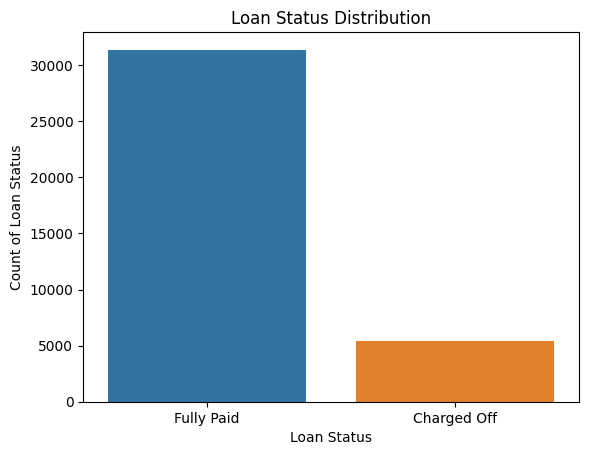

In [209]:
# Plotting count for fully paid and charged off loan status and understand the data count 

chart_loan_status = sns.countplot(x = 'loan_status', data = loan_df_for_analysis)
chart_loan_status.set_title("Loan Status Distribution")
chart_loan_status.set_xlabel("Loan Status")
chart_loan_status.set_ylabel("Count of Loan Status")

In [210]:
# Get the percentage of data for the above loan_status 
print(loan_df_for_analysis.loan_status.value_counts())
print(loan_df_for_analysis.loan_status.count())
print(loan_df_for_analysis.loan_status.value_counts()*100/loan_df_for_analysis.loan_status.count())

loan_status
Fully Paid     31384
Charged Off     5431
Name: count, dtype: int64
36815
loan_status
Fully Paid     85.247861
Charged Off    14.752139
Name: count, dtype: float64


 - <U> As per the above graph, charged off loan percentage is less compared to fully paid. </U>

In [211]:
# Limiting the data analysis to loan_status equals "Charged off" and understand the risks as per the problem statement 
# in order to find related patterns assocaited with defaulters 

loan_df_chargedoff = loan_df_for_analysis[loan_df_for_analysis['loan_status'] == 'Charged Off']



In [212]:
# get the shape of the chargeoff dataframe 
loan_df_chargedoff.shape

(5431, 39)

#### Categorical Variable Analaysis on Charged Off (Default Customers)

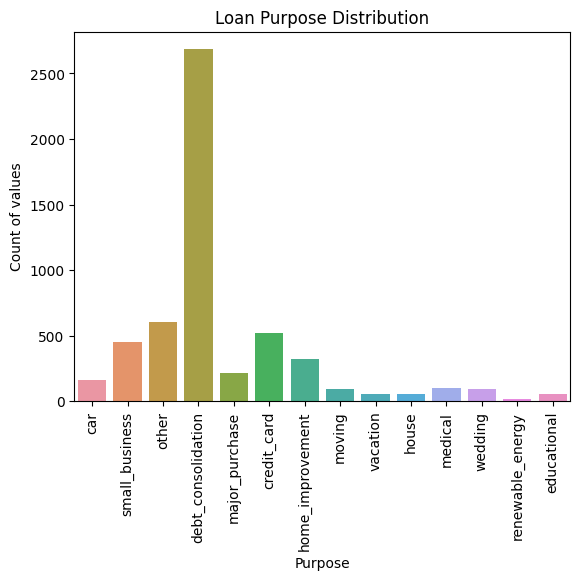

In [213]:
# Unordered Categorical variable  
# Analysis on purpose variable 
chart_loan_purpose = sns.countplot(x = 'purpose', data = loan_df_chargedoff)
chart_loan_purpose.set_title("Loan Purpose Distribution")
chart_loan_purpose.set_xlabel("Purpose")
chart_loan_purpose.set_ylabel("Count of values")
chart_loan_purpose.tick_params(axis='x', rotation=90)

<u>Observation 1:</u> Majority of Charged off loans with "purpose" variable indicates that applicant took loans to pay off other debts 

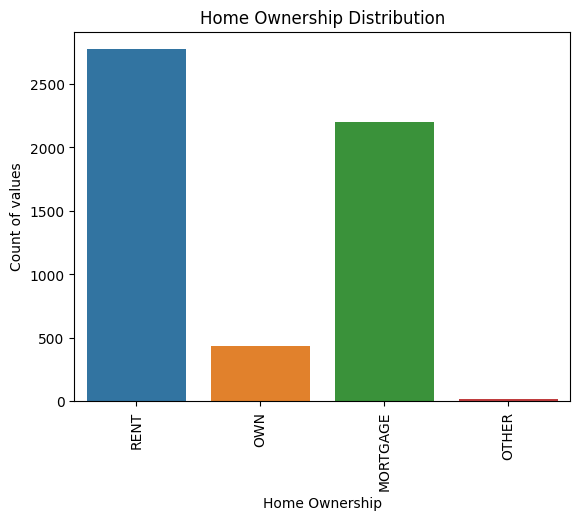

In [214]:
# Analysis on home_ownership
chart_loan_ownership = sns.countplot(x = 'home_ownership', data = loan_df_chargedoff)
chart_loan_ownership.set_title("Home Ownership Distribution")
chart_loan_ownership.set_xlabel("Home Ownership")
chart_loan_ownership.set_ylabel("Count of values")
chart_loan_ownership.tick_params(axis='x', rotation=90)

<u>Observation 2:</u> Majority of Charged off loans with "home_ownership" variable indicates that applicant either stayed in rent or mortgaged house 

Text(0, 0.5, 'Count of values')

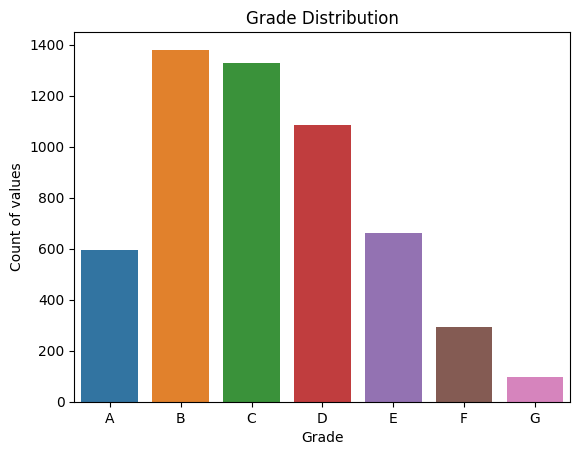

In [215]:
# Ordered Categorical variable
# Analysis on grade 
chart_loan_grade= sns.countplot(x = 'grade', data = loan_df_chargedoff, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
chart_loan_grade.set_title("Grade Distribution")
chart_loan_grade.set_xlabel("Grade")
chart_loan_grade.set_ylabel("Count of values")


<u>Observation 3:</u> Majority of Charged off loans with "grade" variable indicates that applicant with grade "B" defaulted the most, followed by "C" & "D"

Text(0, 0.5, 'Count of values')

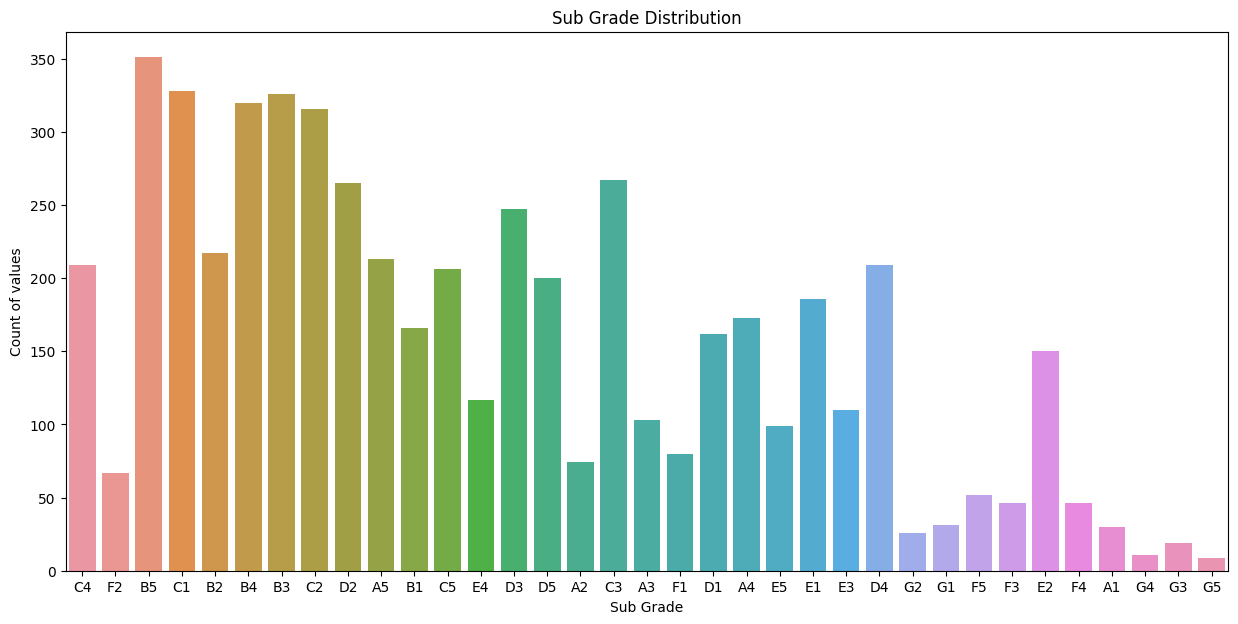

In [216]:
# Analysis on sub_grade
fig, ax = plt.subplots(figsize=(15,7)) 
sub_grade= sns.countplot(x = 'sub_grade', data = loan_df_chargedoff)
sub_grade.set_title("Sub Grade Distribution")
sub_grade.set_xlabel("Sub Grade")
sub_grade.set_ylabel("Count of values")

<u>Observation 4:</u> "sub_grade" variable indicates that applicant with sub grade "B5" defaulted the most, followed by "C2" & "D2"

Text(0, 0.5, 'Count of values')

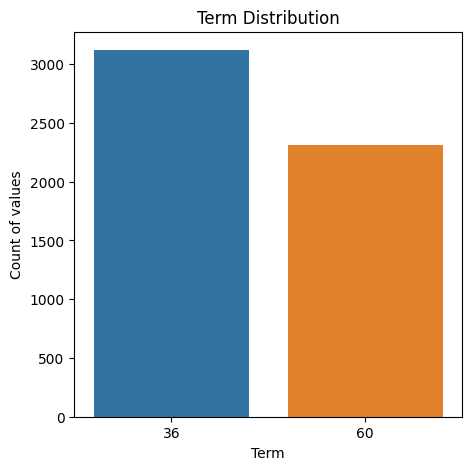

In [217]:
# Analysis on term
fig, ax = plt.subplots(figsize=(5,5)) 
term= sns.countplot(x = 'term', data = loan_df_chargedoff)
term.set_title("Term Distribution")
term.set_xlabel("Term")
term.set_ylabel("Count of values")

<u>Observation 5:</u> "term" variable indicates that the applicant with term of 36 months defaulted the most.

Text(0, 0.5, 'Count of values')

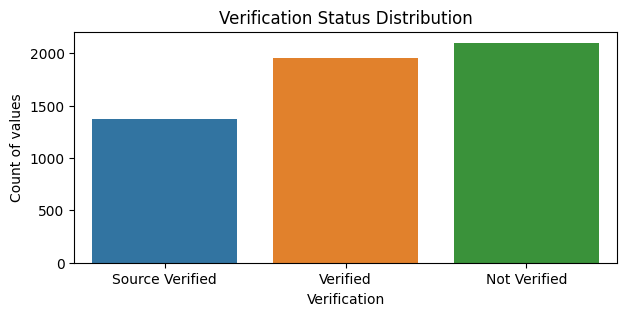

In [218]:
# Analysis on verification status
fig, ax = plt.subplots(figsize=(7,3)) 
ver_status= sns.countplot(x = 'verification_status', data = loan_df_chargedoff)
ver_status.set_title("Verification Status Distribution")
ver_status.set_xlabel("Verification")
ver_status.set_ylabel("Count of values")

<u>Observation 6:</u> Borrowers whose income was not verified defaulted more then verified

#### Numerical Variable Analaysis on Charged Off (Default Customers)

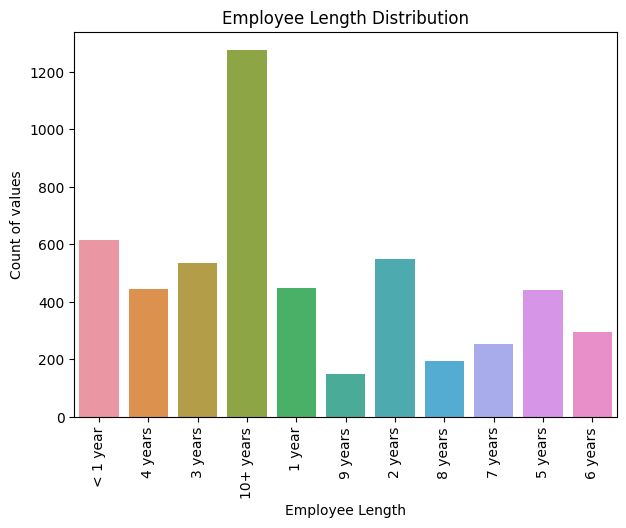

In [219]:
# Analysis on emp_length 
fig, ax = plt.subplots(figsize=(7,5)) 
emp_length= sns.countplot(x = 'emp_length', data = loan_df_chargedoff)
emp_length.set_title("Employee Length Distribution")
emp_length.set_xlabel("Employee Length")
emp_length.set_ylabel("Count of values")
emp_length.tick_params(axis='x', rotation=90)

<u>Observation 7:</u> Borrowers whose experience is more 10 years or more defaulted the most.

In [220]:
# Creating Interest Rate & Loan Amount bucket to analyze defaulters bucket

loan_df_chargedoff['int_rate_buckets'] = pd.cut(loan_df_chargedoff['int_rate'], bins=5,precision =0,labels=['5-10%','11-15%','16-20%','21-25%','26-30%'])
loan_df_chargedoff['loan_amnt_buckets'] = pd.cut(loan_df_chargedoff['loan_amnt'], bins=5,precision =0,labels=['0-10k','11-20k','21-30k','31-40k','41-50k'])
loan_df_chargedoff['dti_buckets'] = pd.cut(loan_df_chargedoff['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [221]:
# Load data to view the bucket 
loan_df_chargedoff.head()

id  loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
1   1077430       2500         2500           2500.0    60     15.27   
8   1071795       5600         5600           5600.0    60     21.28   
9   1071570       5375         5375           5350.0    60     12.69   
12  1064687       9000         9000           9000.0    36     13.49   
14  1069057      10000        10000          10000.0    36     10.65   

    installment grade sub_grade emp_length home_ownership  annual_inc  \
1         59.83     C        C4   < 1 year           RENT     30000.0   
8        152.39     F        F2    4 years            OWN     40000.0   
9        121.45     B        B5   < 1 year           RENT     15000.0   
12       305.38     C        C1   < 1 year           RENT     30000.0   
14       325.74     B        B2    3 years           RENT    100000.0   

   verification_status issue_d  loan_status             purpose addr_state  \
1      Source Verified  Dec-11  Charged Off                 car         GA   
8      Source Verified  Dec-11  Charged Off      small_business         CA   
9             Verified  Dec-11  Charged Off               other         TX   
12     Source Verified  Dec-11  Charged Off  debt_consolidation         VA   
14     Source Verified  Dec-11  Charged Off               other         CA   

      dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
1    1.00            0           Apr-99               5         3        0   
8    5.55            0           Apr-04               2        11        0   
9   18.08            0           Sep-04               0         2        0   
12  10.08            0           Apr-04               1         4        0   
14   7.06            0           May-91               2        14        0   

    revol_bal  revol_util  total_acc  out_prncp  out_prncp_inv  total_pymnt  \
1        1687         9.4          4        0.0            0.0      1008.71   
8        5210        32.6         13        0.0            0.0       646.02   
9        9279        36.5          3        0.0            0.0      1476.19   
12      10452        91.7          9        0.0            0.0      2270.70   
14      11997        55.5         29        0.0            0.0      7471.99   

    total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
1           1008.71           456.46         435.17                 0.0   
8            646.02           162.02         294.94                 0.0   
9           1469.34           673.48         533.42                 0.0   
12          2270.70          1256.14         570.26                 0.0   
14          7471.99          5433.47        1393.42                 0.0   

    recoveries  collection_recovery_fee  last_pymnt_amnt  \
1       117.08                     1.11           119.66   
8       189.06                     2.09           152.39   
9       269.29                     2.52           121.45   
12      444.30                     4.16           305.38   
14      645.10                     6.31           325.74   

    pub_rec_bankruptcies loan_issue_year loan_issue_month int_rate_buckets  \
1                    0.0            2011              Dec           16-20%   
8                    0.0            2011              Dec           26-30%   
9                    0.0            2011              Dec           11-15%   
12                   0.0            2011              Dec           16-20%   
14                   0.0            2011              Dec           11-15%   

   loan_amnt_buckets dti_buckets  
1              0-10k         0-6  
8              0-10k         0-6  
9              0-10k       18-24  
12            11-20k        6-12  
14            11-20k        6-12

Text(0, 0.5, 'Count of values')

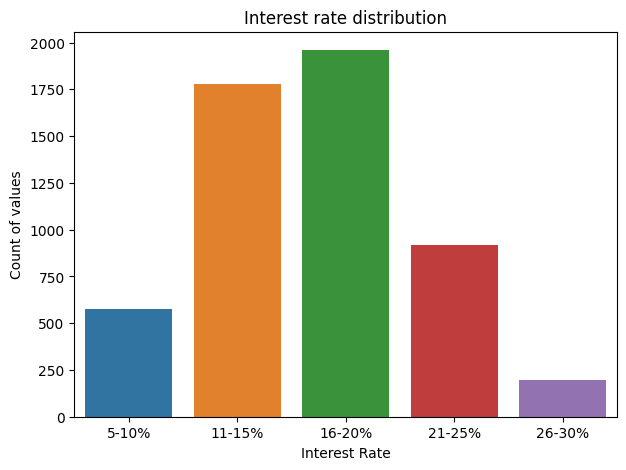

In [222]:
# Analysis on interest rate  
fig, ax = plt.subplots(figsize=(7,5)) 
interest_rate= sns.countplot(x = 'int_rate_buckets', data = loan_df_chargedoff)
interest_rate.set_title("Interest rate distribution")
interest_rate.set_xlabel("Interest Rate")
interest_rate.set_ylabel("Count of values")

<u>Observation 8:</u> Borrowers who took loans at an interest rate between 16-20% defaulted the most. 

Text(0, 0.5, 'Count of values')

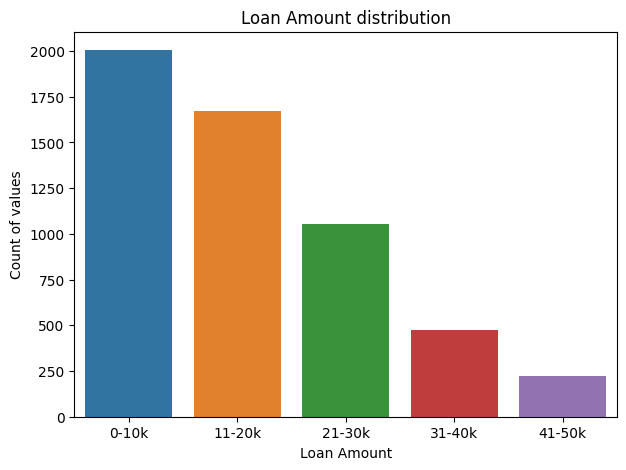

In [223]:
# Analysis on loan amount  
fig, ax = plt.subplots(figsize=(7,5)) 
loan_amnt= sns.countplot(x = 'loan_amnt_buckets', data = loan_df_chargedoff)
loan_amnt.set_title("Loan Amount distribution")
loan_amnt.set_xlabel("Loan Amount")
loan_amnt.set_ylabel("Count of values")

<u>Observation 9:</u> Borrowers who took loans amount between 0-10k defaulted the most. 

Text(0, 0.5, 'Count of values')

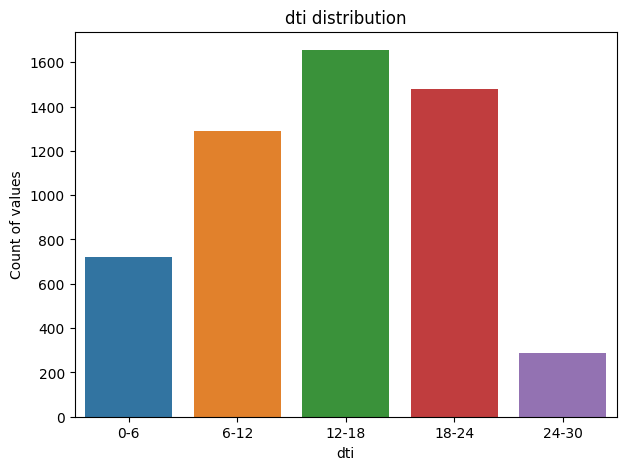

In [224]:
# Analysis on Dti (debt to income ratio)

fig, ax = plt.subplots(figsize=(7,5)) 
Dti= sns.countplot(x = 'dti_buckets', data = loan_df_chargedoff)
Dti.set_title("dti distribution")
Dti.set_xlabel("dti")
Dti.set_ylabel("Count of values")


<u>Observation 10:</u> Borrowers with dti range between 12-18 defaulted the most 

### Segmented Univariate Analysis 

Text(0.5, 1.0, 'State Wise Loan Distribution by Loan Status')

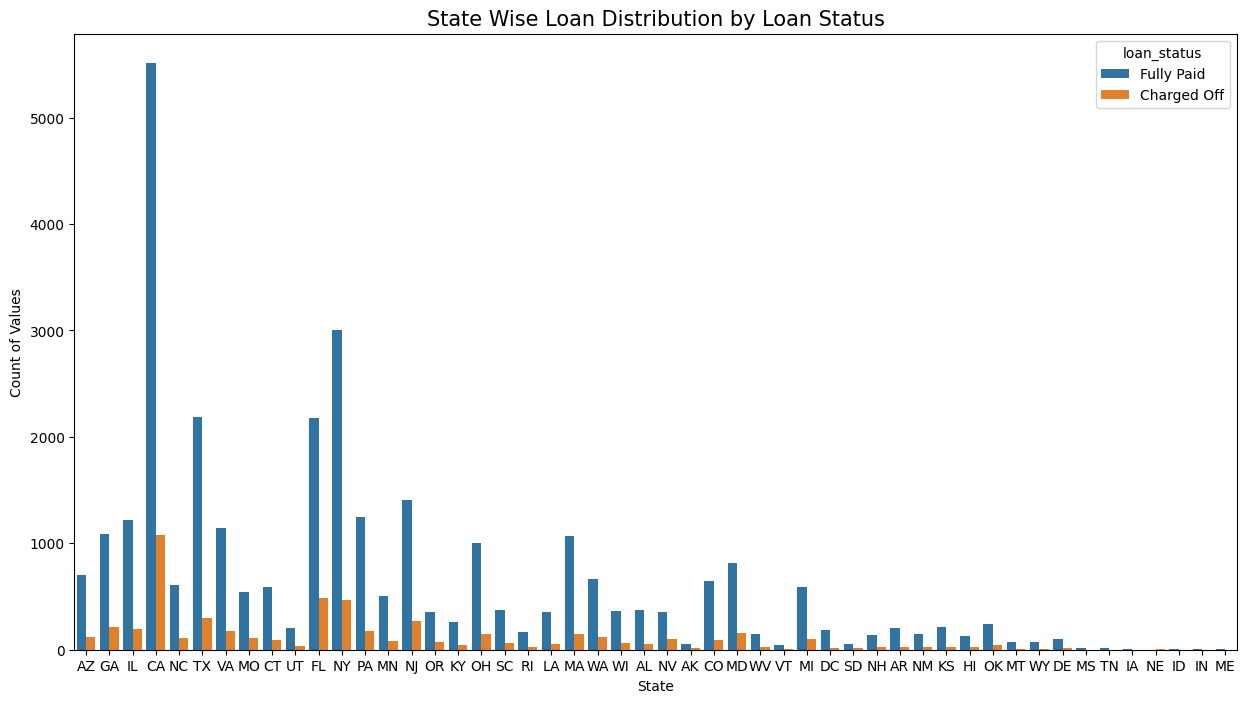

In [225]:
# State wise loan distribution using loan status 
fig, ax = plt.subplots(figsize=(15,8))
statewisedist = sns.countplot(data=loan_df_for_analysis,x='addr_state',hue='loan_status')
statewisedist.set_xlabel('State')
statewisedist.set_ylabel('Count of Values')
statewisedist.set_title('State Wise Loan Distribution by Loan Status',fontsize=15)


<u>Observation 10:</u> Most of the borrowers are from the state "CA","NY","TX" and "FL" where major defaulters are from "CA", "FL" and "NY".

Text(0.5, 1.0, 'Loan Purpose Distribution By Loan Status')

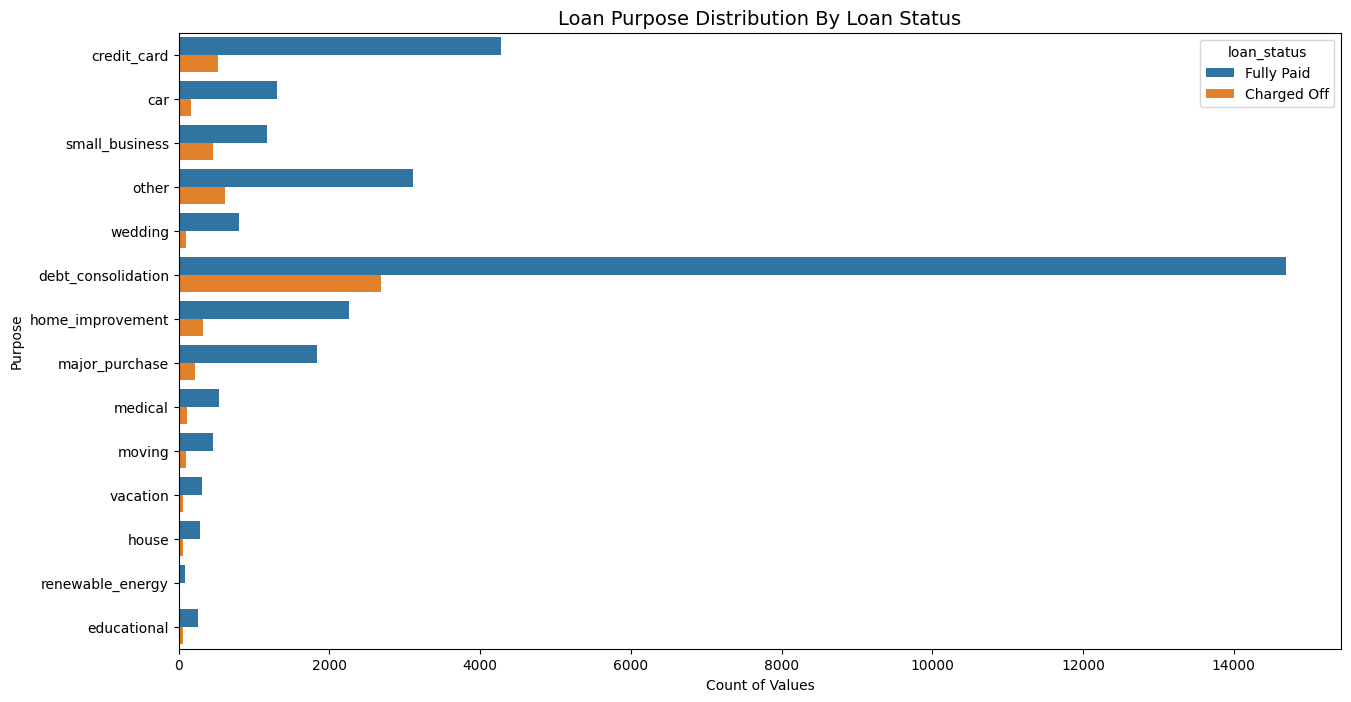

In [226]:
# Purpose of loan taken by loan_status
fig, ax = plt.subplots(figsize=(15,8))
loanpurpose = sns.countplot(data=loan_df_for_analysis,y='purpose',hue='loan_status')
loanpurpose.set_xlabel('Count of Values')
loanpurpose.set_ylabel('Purpose')
loanpurpose.set_title('Loan Purpose Distribution By Loan Status',fontsize=14)


<u>Observation 11:</u> Debt consolidation is the major reason for both fully paid and charged off loan applicant.

Text(0.5, 1.0, 'DTI By Loan Status')

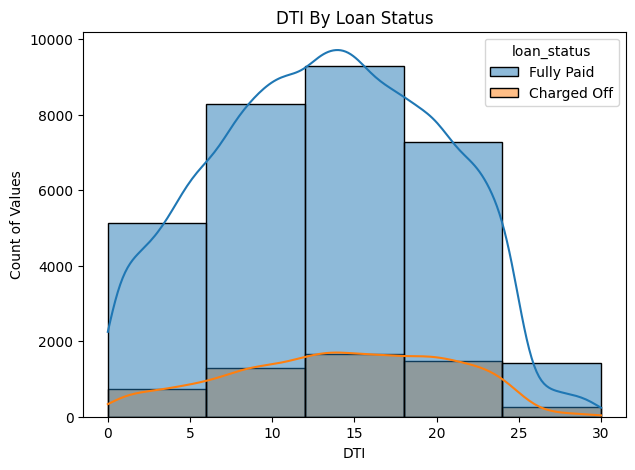

In [227]:
 # Dti (Debt to Income ratio) Vs Loan Status
fig, ax = plt.subplots(figsize=(7,5))
Dti = sns.histplot(data=loan_df_for_analysis,x='dti',hue='loan_status', bins=5,kde=True)
Dti.set_xlabel('DTI')
Dti.set_ylabel('Count of Values')
Dti.set_title('DTI By Loan Status',fontsize=12)

<u>Observation 12:</u> DTI between 10-20 indicates a higher risks in terms of defaulters

Text(0.5, 1.0, 'Interest Rate By Loan Status')

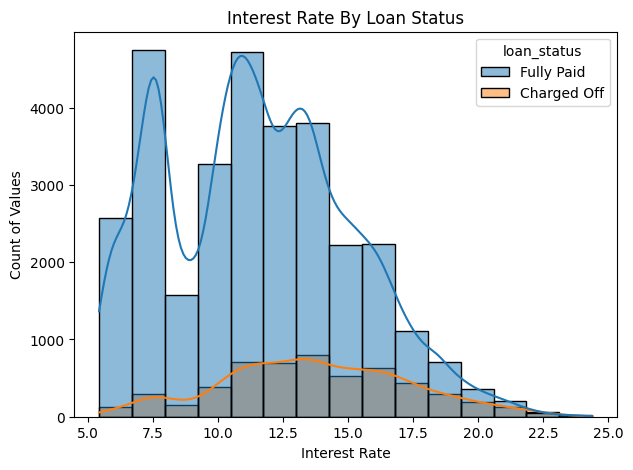

In [228]:
 # Interest Rate Vs Loan Status

fig, ax = plt.subplots(figsize=(7,5))
Interest_Rate = sns.histplot(data=loan_df_for_analysis,x='int_rate',hue='loan_status', bins=15,kde=True)
Interest_Rate.set_xlabel('Interest Rate')
Interest_Rate.set_ylabel('Count of Values')
Interest_Rate.set_title('Interest Rate By Loan Status',fontsize=12)


<u>Observation 13:</u> Interest Rate between 10-17.5 has more number of defaulters

Text(0.5, 1.0, 'Annual Income By Loan Status')

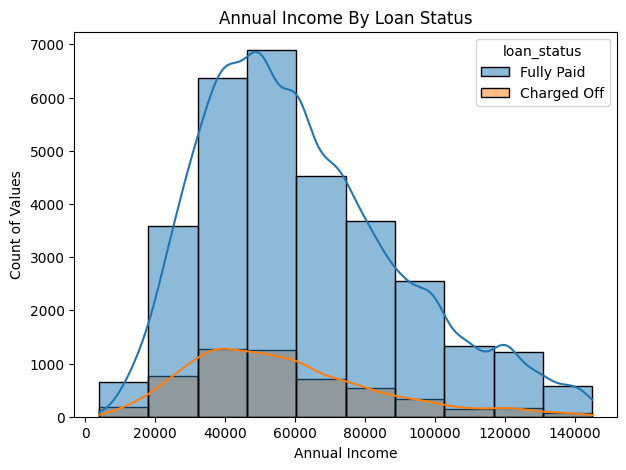

In [229]:
 # Annual Income Vs Loan Status

fig, ax = plt.subplots(figsize=(7,5))
Annual_Income = sns.histplot(data=loan_df_for_analysis,x='annual_inc',hue='loan_status', bins=10,kde=True)
Annual_Income.set_xlabel('Annual Income')
Annual_Income.set_ylabel('Count of Values')
Annual_Income.set_title('Annual Income By Loan Status',fontsize=12)

<u>Observation 14:</u> Borowwers with Annual Income greater than 20K and less than 50k are more prone to default. 

### Categorical Bivariate Analysis

Text(0.5, 1.0, 'Employee Length Vs Home Ownership')

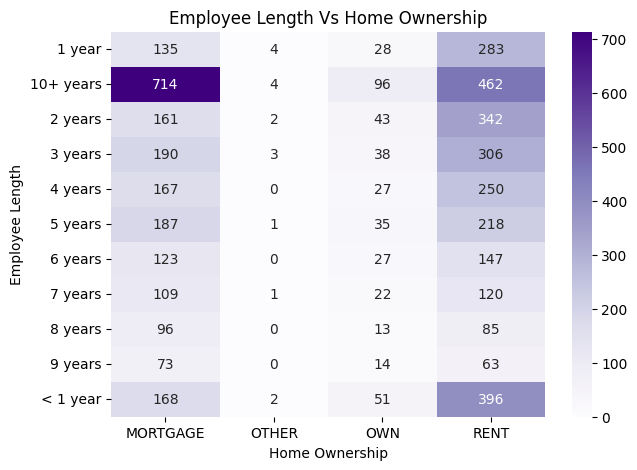

In [230]:
 # On Employee Length and Home Ownership
 # Creating a cross tab 
cross_emplen_homeowner =  pd.crosstab(loan_df_chargedoff['emp_length'],loan_df_chargedoff['home_ownership'])

fig, ax = plt.subplots(figsize=(7,5))
emplen_homeowner = sns.heatmap(cross_emplen_homeowner, fmt='d', cmap='Purples', annot=True)
emplen_homeowner.set_xlabel('Home Ownership')
emplen_homeowner.set_ylabel('Employee Length')
emplen_homeowner.set_title('Employee Length Vs Home Ownership',fontsize=12)

<u>Observation 15:</u> Borrowers who have more than 10+ years of experience and live on rent or mortgages have high default rate

Text(0.5, 1.0, 'Home Ownership Vs Grade')

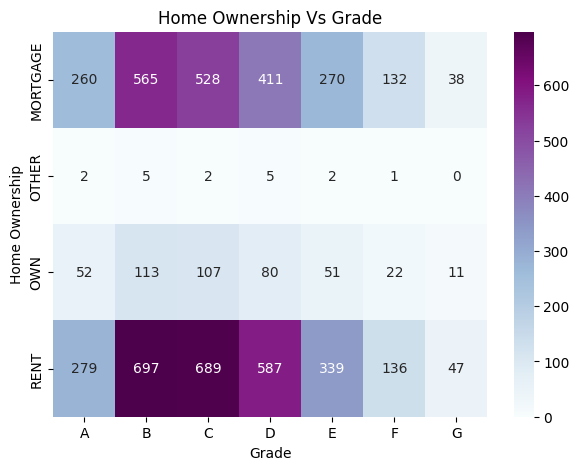

In [231]:

# On Home Ownership Vs Grade 
# Creating a cross tab 
cross_grade_homeowner =  pd.crosstab(loan_df_chargedoff['home_ownership'], loan_df_chargedoff['grade'])

fig, ax = plt.subplots(figsize=(7,5))
cross_grade_homeowner = sns.heatmap(cross_grade_homeowner, fmt='d', cmap='BuPu', annot=True)
cross_grade_homeowner.set_xlabel('Grade')
cross_grade_homeowner.set_ylabel('Home Ownership')
cross_grade_homeowner.set_title('Home Ownership Vs Grade',fontsize=12)

<u>Observation 16:</u> Borrowers with assigned grade B,C & D fall in higher catergory of defaulters 

Text(0.5, 1.0, 'Home Ownership Vs Loan Term')

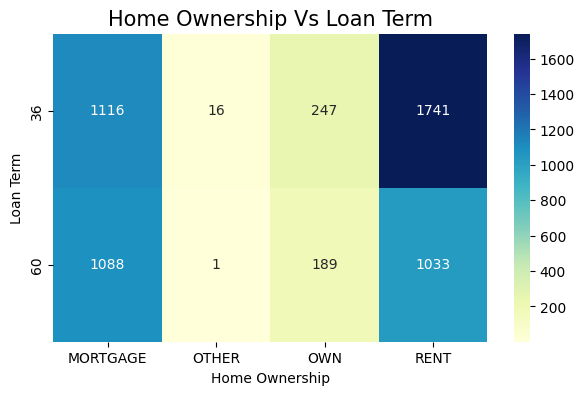

In [232]:
# Home Ownership Vs Loan Term 
# Creating a cross tab
ctab_term_homeownership = pd.crosstab(loan_df_chargedoff['term'], loan_df_chargedoff['home_ownership'])

fig, ax = plt.subplots(figsize=(7,4))
ctab_term_homeownership = sns.heatmap(ctab_term_homeownership, annot=True, fmt='d', cmap='YlGnBu')
ctab_term_homeownership.set_xlabel('Home Ownership')
ctab_term_homeownership.set_ylabel('Loan Term')
ctab_term_homeownership.set_title('Home Ownership Vs Loan Term',fontsize=15)


<u>Observation 17:</u> Borrowers staying on Rent and with shorter loan term tend to default more. 

### Numerical Bivariate Analysis

In [233]:
# Adding a new column 
loan_df_for_analysis['loan_amnt_buckets'] = pd.cut(loan_df_for_analysis['loan_amnt'], bins=5,precision =0,labels=['0-10k','11-20k','21-30k','31-40k','41-50k']) 

Text(0.5, 1.0, 'Loan Amount Buckets Vs Interest Rate')

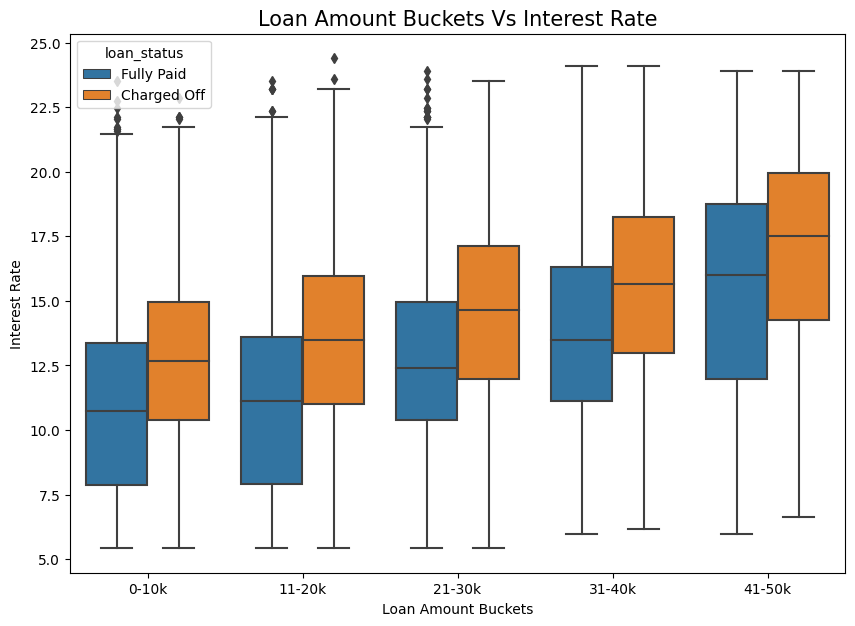

In [234]:
# On Interest rate and Loan Amount Bucket 
fig, ax = plt.subplots(figsize=(10,7))
interest_rate_Loan = sns.boxplot(y='int_rate',x='loan_amnt_buckets',data=loan_df_for_analysis, hue='loan_status')
interest_rate_Loan.set_xlabel('Loan Amount Buckets')
interest_rate_Loan.set_ylabel('Interest Rate')
interest_rate_Loan.set_title('Loan Amount Buckets Vs Interest Rate',fontsize=15)

<u>Observation 18:</u> As per the above data points we see can interest rate is high for the charged off loan_status compared to fully paid.

Text(0.5, 1.0, 'Interest Rate Vs 2-Year Delinquencies')

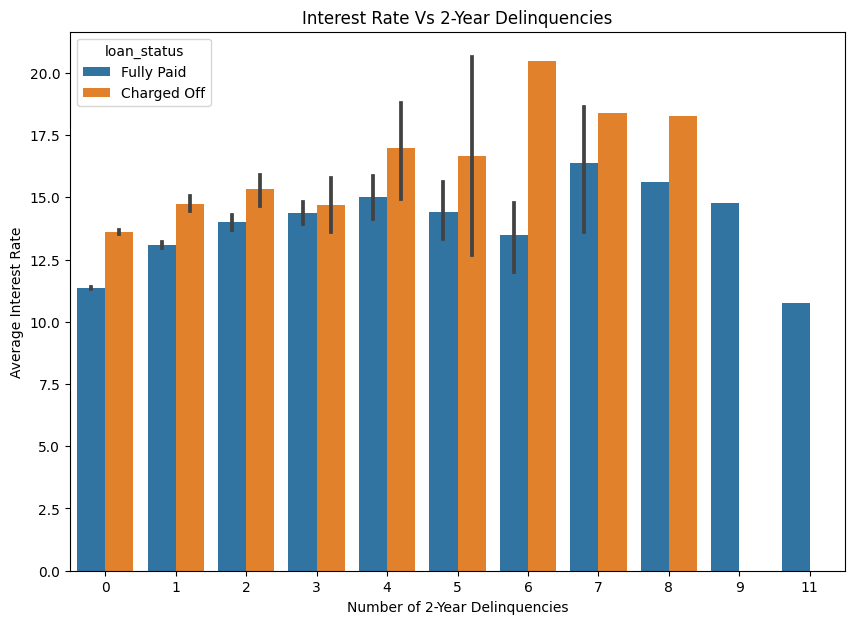

In [235]:
# Interest rate vs delinq
fig, ax = plt.subplots(figsize=(10,7))
interestratevsdelinq = sns.barplot(x='delinq_2yrs', y='int_rate', data=loan_df_for_analysis , hue='loan_status')
interestratevsdelinq.set_xlabel('Number of 2-Year Delinquencies')
interestratevsdelinq.set_ylabel('Average Interest Rate')
interestratevsdelinq.set_title('Interest Rate Vs 2-Year Delinquencies')

<u>Observation 19:</u> 2-year delinq with value 6 has the highest interest rate.

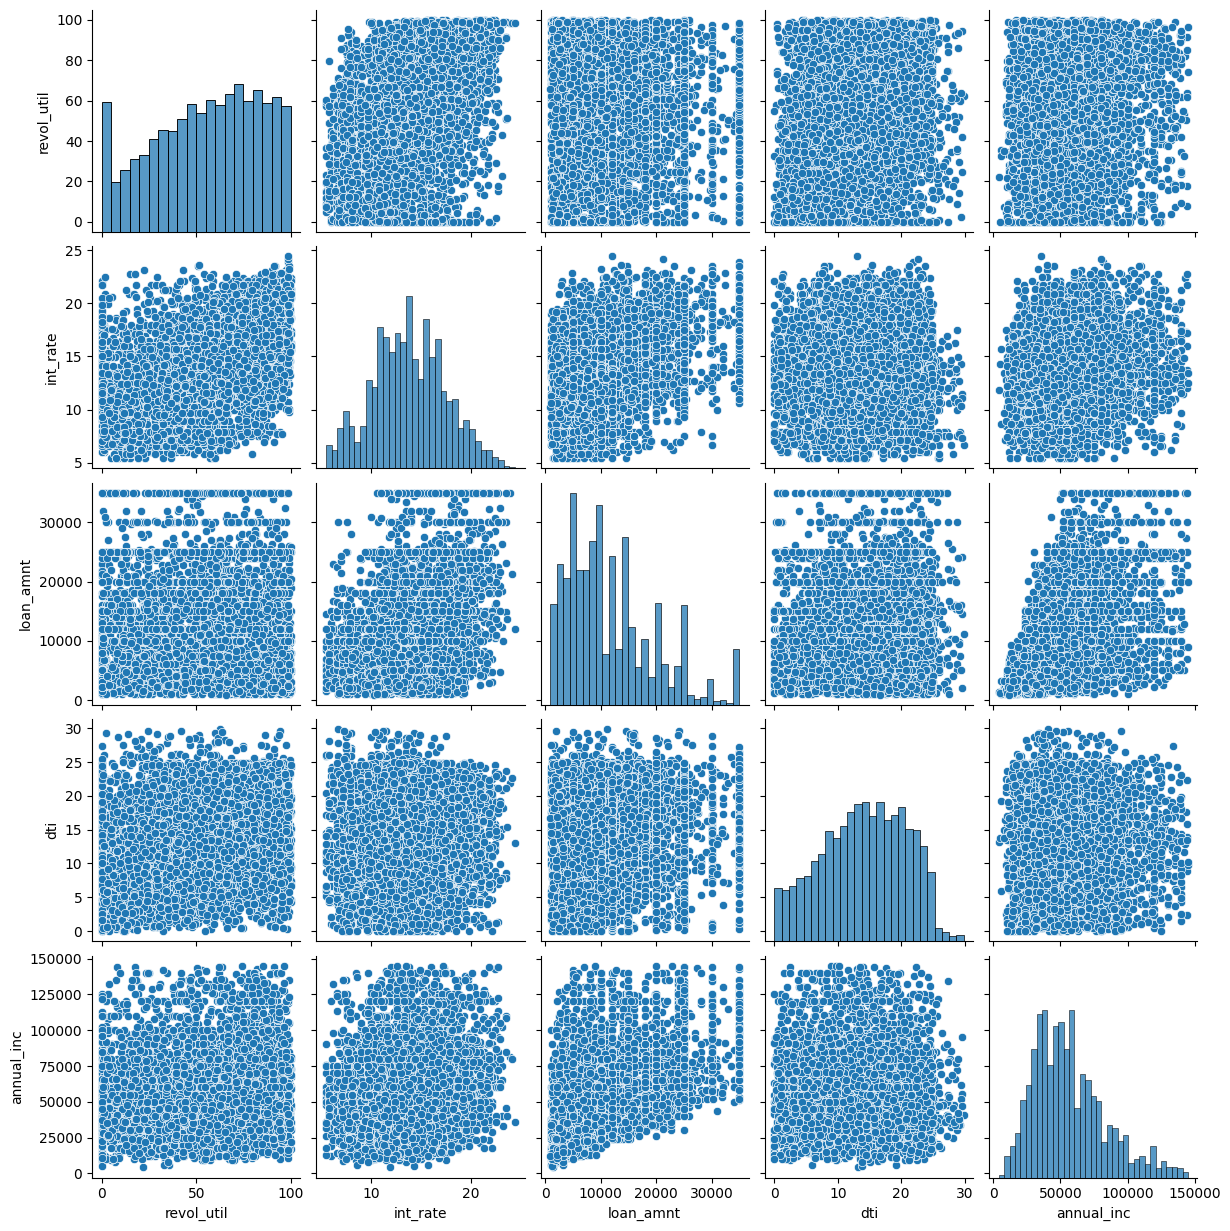

In [236]:
# using pair plot for understanding the distribution accross different numerical variables 
sns.pairplot(loan_df_chargedoff, vars=['revol_util', 'int_rate', 'loan_amnt', 'dti', 'annual_inc'])


## Multivariate Analysis

<Axes: >

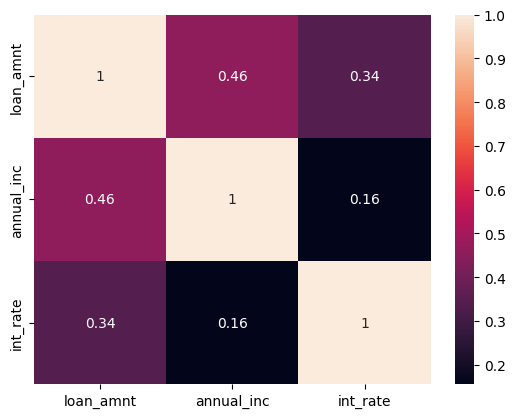

In [237]:
# Plotting correlation between loan amount, annual income and interest rate on charged off loan status
num_cols = ['loan_amnt', 'annual_inc','int_rate']
sns.heatmap(loan_df_chargedoff[num_cols].corr(),annot=True)


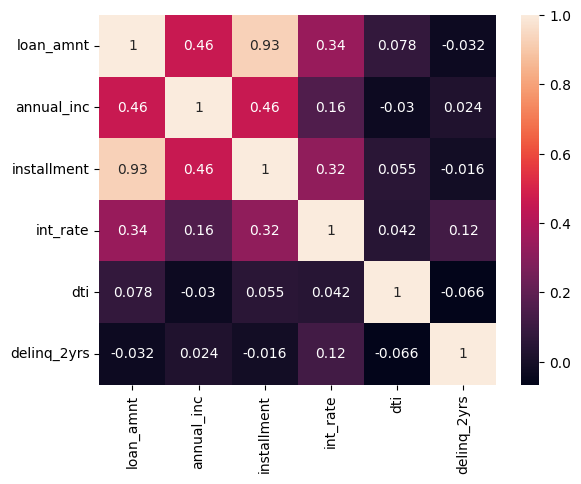

In [238]:
# Plotting correlation between loan amount, annual income,installment, interest rate, dti and delinq_2yrs on charged off loan status

num_cols = ['loan_amnt', 'annual_inc', 'installment', 'int_rate', 'dti','delinq_2yrs']
sns.heatmap(loan_df_chargedoff[num_cols].corr(),annot=True)
plt.show()

<Axes: >

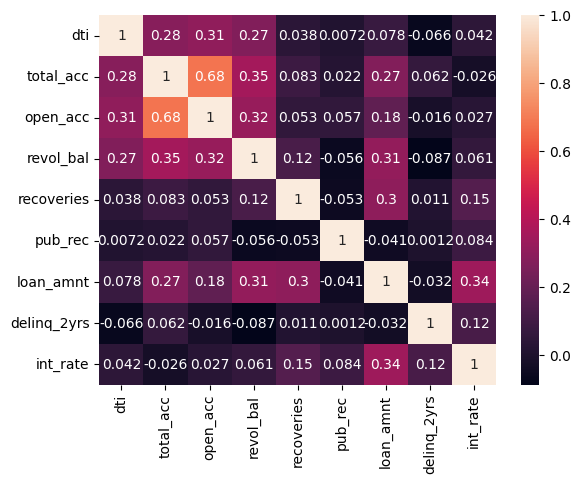

In [239]:

# Adding additional variables to the above plot to understand correlation  

num_cols = ['dti','total_acc','open_acc','revol_bal','recoveries','pub_rec','loan_amnt','delinq_2yrs','int_rate']
sns.heatmap(loan_df_chargedoff[num_cols].corr(),annot=True)


# Derived Metrics Analysis

Text(0.5, 1.0, 'Number of Charged Off Loans Issued by Month')

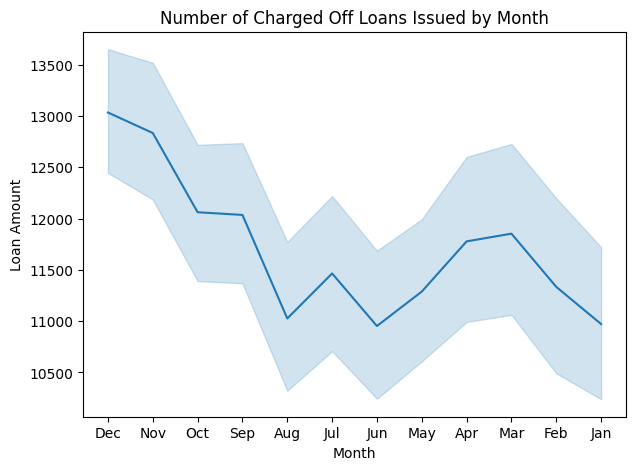

In [240]:
# Using derived column month to plot charged off loans to identify the month where loans taken was maximum.

fig, ax = plt.subplots(figsize=(7,5))
loan_issue_month = sns.lineplot(data =loan_df_chargedoff,y='loan_amnt', x='loan_issue_month')
loan_issue_month.set_xlabel("Month")
loan_issue_month.set_ylabel("Loan Amount")
loan_issue_month.set_title('Number of Charged Off Loans Issued by Month')

<u>Observation 20:</u> Maximum charged off loans were issued in the month of Dec

Text(0.5, 1.0, 'Number of Charged Off Loans Issued by Year')

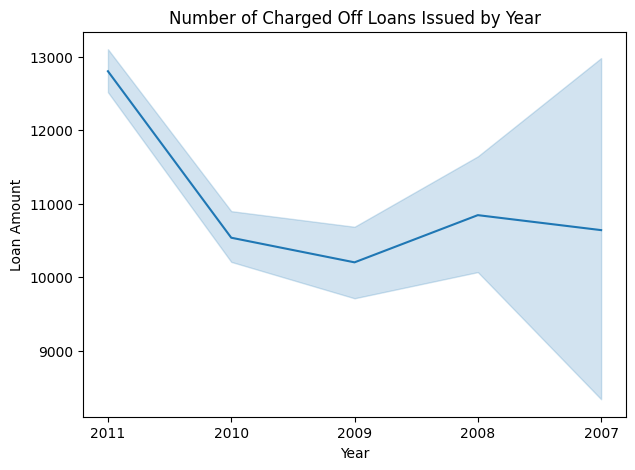

In [241]:
# Using derived column year to plot charged off loans to identify the month where loans taken was maximum. 

fig, ax = plt.subplots(figsize=(7,5))
loan_issue_month = sns.lineplot(data =loan_df_chargedoff,y='loan_amnt', x='loan_issue_year')
loan_issue_month.set_xlabel("Year")
loan_issue_month.set_ylabel("Loan Amount")
loan_issue_month.set_title('Number of Charged Off Loans Issued by Year')

<u>Observation 21:</u> Maximum charged off loans were issued in the year 2011